In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('sources/stoloto_data.csv',
                       sep=',', encoding='latin1',
                       parse_dates=['date'], dayfirst=False, index_col=0)

In [24]:
df.head(10)

,ops_num,game_code,circulation,ufps_num,postamt_num,sales,date
0,117463,7105,216,2,165,57,2017-01-15
2,117218,7105,217,2,165,17,2017-01-22
4,109518,7105,218,2,484,16,2017-01-29
8,119311,7105,209,2,306,22,2016-11-27
13,105043,7105,212,2,224,25,2016-12-18
14,119192,7105,213,2,306,22,2016-12-25
17,119619,7105,261,2,306,68,2017-11-26
20,119619,7105,262,2,306,51,2017-12-03
31,111622,7105,294,2,224,16,2018-07-15
50,111398,7105,244,2,224,10,2017-07-30


In [25]:
df.describe()

,ops_num,game_code,circulation,ufps_num,postamt_num,sales
count,30021.000000,30021.000000,30021.000000,30021.0,30021.000000,30021.000000
mean,119014.466473,7110.333133,464.024050,2.0,328.856101,44.893808
std,7361.429245,17.107149,475.309325,0.0,203.664387,143.597791
min,103132.000000,7101.000000,1.000000,2.0,96.000000,3.000000
25%,115088.000000,7103.000000,121.000000,2.0,165.000000,16.000000
50%,119602.000000,7105.000000,239.000000,2.0,306.000000,24.000000
75%,125430.000000,7115.000000,1173.000000,2.0,484.000000,41.000000
max,129338.000000,7175.000000,1269.000000,2.0,664.000000,5771.000000


In [26]:
# So we have 30021 values for all columns, no NaN values.
# I don't see much physical meaning in statistics for categolical features such game_code, postamt_num, ufps_num
# Hmm, std for 'ufps_num' is 0. Let's check is it a constant
df['ufps_num'].value_counts() 

2    30021
Name: ufps_num, dtype: int64

In [32]:
# Yes, it is. It's useless, let's delete it
del df['ufps_num']

In [40]:
df['game_code'].value_counts()
# game_code have only 5 possible values, probably we should change this feature into 5 dummy variables

7103    8400
7105    8035
7115    6993
7101    4791
7175    1802
Name: game_code, dtype: int64

In [9]:
df['postamt_num'].value_counts()
# Again, postamt_num consist of 6 groups about the same size and can be replaced with 6 dummy variables.

664    5909
96     5759
306    5234
224    4663
484    4247
165    4209
Name: postamt_num, dtype: int64

In [33]:
df.corr()

,ops_num,game_code,circulation,postamt_num,sales
ops_num,1.000000,-0.007007,0.004413,0.041359,0.004647
game_code,-0.007007,1.000000,-0.351192,0.003224,-0.074986
circulation,0.004413,-0.351192,1.000000,0.009910,0.219951
postamt_num,0.041359,0.003224,0.009910,1.000000,0.008260
sales,0.004647,-0.074986,0.219951,0.008260,1.000000


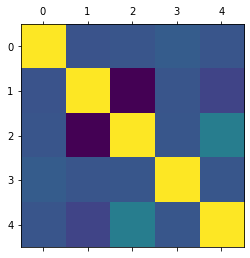

In [35]:
plt.matshow(df.corr())
plt.show()
#We have weak correlation between circulation and game_code (-0.35) but we still can work with it.

In [29]:
df['circulation'].nunique()

391

In [30]:
df['ops_num'].nunique()

93